In [1]:
from scipy.io import loadmat

import random  

import matplotlib.pyplot as plt

In [2]:
random.randrange(100)

44

In [3]:
mnist_raw = loadmat("../data/mnist-original.mat")
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
    }

X,y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
def plot_number_pos(n):
    print(n)
    some_digit = X[n]
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(
        some_digit_image, 
        cmap = plt.cm.binary,
        interpolation="nearest")
    plt.title(y[n])
    plt.axis("off")
    plt.show()

In [5]:
def plot_number():
    limit = len(X)
    n = (random.randrange(limit))
    some_digit = X[n]
    some_digit_image = some_digit.reshape(28, 28)

    plt.imshow(
        some_digit_image, 
        cmap = plt.cm.binary,
        
        interpolation="nearest")
    plt.title(y[n])
    plt.axis("off")
    plt.show()

In [6]:
len(X)

70000

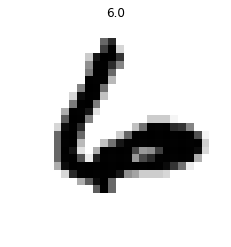

In [7]:
plot_number()

50000


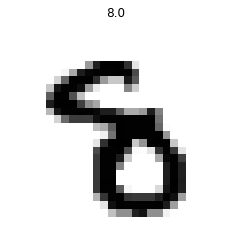

In [8]:
plot_number_pos(50000)

In [31]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [36]:
import numpy as np

shuffle_index = np.random.permutation(70000)
X, y = X[shuffle_index], y[shuffle_index]

X_train, X_test, y_train, y_test = X[:69000], X[69000:], y[:69000], y[69000:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(69000, 784) (1000, 784) (69000,) (1000,)


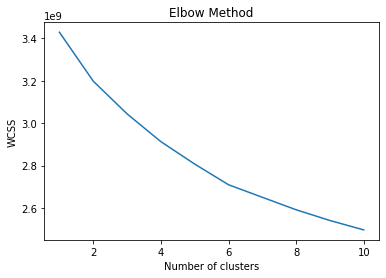

In [37]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_test)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [39]:
pred_y = kmeans.fit_predict(X_test)

In [41]:
pred_y[0]

7

In [42]:
len(y_test)

1000

In [43]:
len(pred_y)

1000

In [53]:
X_std = StandardScaler().fit_transform(X_test)

In [54]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)

Text(0, 0.5, 'PCA 2')

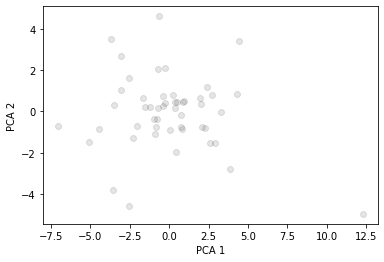

In [55]:
plt.scatter(principalComponents[0], principalComponents[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X_test)

In [58]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)